In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [72]:
data = pd.read_csv('energyConsumption.csv')
data

,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector
0,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096
1,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458
2,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159
3,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152
4,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631
5,385.648,933.663,227.897,687.473,1942.080,2641.221,1540.532,1543.553,1709.752
6,326.179,981.183,197.526,693.949,1999.819,2691.487,1583.965,1587.202,1846.331
7,338.036,1018.978,206.942,706.301,2111.198,2817.613,1646.394,1649.550,1889.873
8,361.672,956.550,210.244,651.041,2035.699,2661.997,1502.988,1505.857,1664.842
9,461.932,991.668,266.381,693.462,2232.462,2911.515,1577.804,1580.742,1638.807


In [73]:
data = data.values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((436, 10), (109, 10), (436, 1), (109, 1))

In [75]:
newColumn = np.ones((data.shape[0],1))
data = np.append(newColumn,data, axis = 1)
data.shape

(545, 10)

In [76]:
X = np.zeros([data.shape[0],data.shape[1]-1])
X[:, 0] = data[:, 0]
X[:, 1] = data[:, 1]
X[:, 2] = data[:, 3]
X[:, 3] = data[:, 4]
X[:, 4] = data[:, 5]
X[:, 5] = data[:, 6]
X[:, 6] = data[:, 7]
X[:, 7] = data[:, 8]
X[:, 8] = data[:, 9]
y = np.zeros([data.shape[0],1])
y[:,0] = data[:, 2]
thetas = np.zeros([1,X.shape[1]])
X.shape, y.shape, thetas.shape

((545, 9), (545, 1), (1, 9))

In [77]:
#Scikit learn
X_axis = data[:,1:10]
model = LinearRegression()
model.fit(X_axis,y)
pred = model.predict(X_axis)
model.coef_, model.intercept_

(array([[-1.48857080e-12,  1.00000000e+00, -1.48758732e-12,
          1.48787159e-12, -1.48908528e-12,  1.48894035e-12,
         -1.52369031e-12,  1.52375684e-12, -1.48865238e-12]]),
 array([-4.54747351e-13]))

In [78]:
#Cost Function
def calcVectorizedCost(X, y, theta): 
    n = y.shape[0]
    diff = (np.dot(X,theta.T)-y)
    cost = 1/(2*n) * np.sum(diff**2)
    return cost

In [79]:
calcVectorizedCost(X,y,thetas)

1258088.6956064815

In [80]:
#Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    n = y.shape[0]
    for i in range (iters):
        A = np.dot(X,theta.T)
        theta = theta - alpha*(1/n)*np.dot(X.T, A - y).T
    cost = calcVectorizedCost(X, y, theta)
    return theta, cost

In [81]:
gradientDescent(X,y,thetas,0.01,0)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 1258088.6956064815)

Cost after  100000  iterations:  10.161829952121389
Cost after  200000  iterations:  2.519896200367852
Cost after  300000  iterations:  0.6777733357042668
Cost after  400000  iterations:  0.23253328794349168
Cost after  500000  iterations:  0.12485218212916023
Cost after  600000  iterations:  0.0987428275920251
Cost after  700000  iterations:  0.09234552530814176
Cost after  800000  iterations:  0.09071178359158756
Cost after  900000  iterations:  0.09022927625903454
[[ 0.00160171  0.99890469  1.00386388 -1.00296278  0.99802087 -0.99744944
   0.00581116 -0.00803828  0.99974774]]


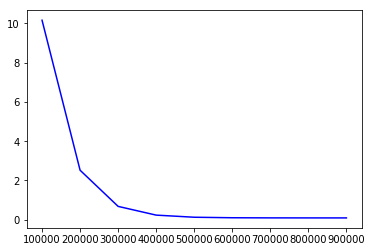

In [82]:
iterations = 1000000
x_axis = list()
y_axis = list()
for i in range (100000,iterations,100000):
    theta, cost= gradientDescent(X,y,thetas,0.00000007,i)
    print("Cost after " ,i, " iterations: " ,cost)
    x_axis.append(i)
    y_axis.append(cost)
plt.plot(x_axis,y_axis, color = 'blue')
print(theta)

In [85]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_squared_log_error(y_test,pred))
print(model.score(X_test, y_test))

4.054086173048741e-25
2.460667043808661e-31
1.0


In [ ]:
#SVR
